Calculation of normalized gene expression values (TPM) and plotting of relative opsin gene expression.
Input: raw reads from rnaseq.
Samples: Diplotaxodon specimens used for differential gene expression of whole eyes.

In [11]:
import pandas as pd

# Read and format data

In [44]:
# Raw gene counts from htseq-count
raw_counts = pd.read_csv('../data/06_rnaseq_count-matrix_htseq-count.txt',
                         sep='\t')

In [45]:
raw_counts.head()

,D33I06,D33I07,D33I08,D33I10,D33J01,D34G04,D34G05,D34G06,D34G07,D34G09,D34G10
ATP6,45393,96347,151991,56986,220755,336505,120645,73041,190410,96692,86476
ATP8,25,48,56,64,168,254,67,68,138,139,54
COX1,204040,298418,719519,246612,760531,1609344,604265,335379,941506,399870,548081
COX2,172959,203765,386016,173014,356926,878604,261044,175734,438330,213707,212373
COX3,158350,242755,294057,154413,386065,687309,204691,148685,401136,167660,152496


In [46]:
# Exclude D. holochromis sample D34G04
del raw_counts['D34G04']

In [47]:
# A. calliptera annotation
feature_table= pd.read_csv("../data/06_fAstCal1.2/GCF_900246225.1_fAstCal1.2_feature_table.txt",
                           sep='\t')

/tmp/ipykernel_2733338/1944017207.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  feature_table= pd.read_csv("../data/06_fAstCal1.2/GCF_900246225.1_fAstCal1.2_feature_table.txt",


In [48]:
feature_table.head()

,feature,class,assembly,assembly_unit,seq_type,chromosome,genomic_accession,start,end,strand,product_accession,non-redundant_refseq,related_accession,name,symbol,GeneID,locus_tag,feature_interval_length,product_length,attributes
0,gene,protein_coding,GCF_900246225.1,Primary Assembly,chromosome,1,NC_039302.1,13087,21712,-,NaN,NaN,NaN,NaN,lto1,113029702.0,NaN,8626,NaN,NaN
1,mRNA,NaN,GCF_900246225.1,Primary Assembly,chromosome,1,NC_039302.1,13087,21712,-,XM_026180986.1,NaN,XP_026036771.1,"LTO1, ABCE1 maturation factor",lto1,113029702.0,NaN,861,861.0,NaN
2,CDS,with_protein,GCF_900246225.1,Primary Assembly,chromosome,1,NC_039302.1,13441,21631,-,XP_026036771.1,NaN,XM_026180986.1,oral cancer-overexpressed protein 1,lto1,113029702.0,NaN,426,141.0,NaN
3,gene,protein_coding,GCF_900246225.1,Primary Assembly,chromosome,1,NC_039302.1,79160,81588,+,NaN,NaN,NaN,NaN,fgf3,113030404.0,NaN,2429,NaN,NaN
4,mRNA,NaN,GCF_900246225.1,Primary Assembly,chromosome,1,NC_039302.1,79160,81588,+,XM_026182227.1,NaN,XP_026038012.1,fibroblast growth factor 3,fgf3,113030404.0,NaN,1579,1579.0,NaN


In [49]:
feature_table_prot_coding = feature_table[(feature_table['feature'] == 'gene') & 
                                          (feature_table['class'] == 'protein_coding')]

In [53]:
feature_table_prot_coding = feature_table_prot_coding.set_index('symbol')

In [55]:
# Join dataframes to add length info to each gene entry in the count matrix
raw_counts_join = raw_counts.join(feature_table_prot_coding)

In [57]:
raw_counts_join.head()

,D33I06,D33I07,D33I08,D33I10,D33J01,D34G05,D34G06,D34G07,D34G09,D34G10,...,strand,product_accession,non-redundant_refseq,related_accession,name,GeneID,locus_tag,feature_interval_length,product_length,attributes
ATP6,45393,96347,151991,56986,220755,120645,73041,190410,96692,86476,...,+,NaN,NaN,NaN,NaN,13540403.0,NaN,683.0,NaN,NaN
ATP8,25,48,56,64,168,67,68,138,139,54,...,+,NaN,NaN,NaN,NaN,13540402.0,NaN,168.0,NaN,NaN
COX1,204040,298418,719519,246612,760531,604265,335379,941506,399870,548081,...,+,NaN,NaN,NaN,NaN,13540400.0,NaN,1593.0,NaN,NaN
COX2,172959,203765,386016,173014,356926,261044,175734,438330,213707,212373,...,+,NaN,NaN,NaN,NaN,13540401.0,NaN,691.0,NaN,NaN
COX3,158350,242755,294057,154413,386065,204691,148685,401136,167660,152496,...,+,NaN,NaN,NaN,NaN,13540404.0,NaN,784.0,NaN,NaN


# Gene count normalization

In [ ]:
# Normalization

### 1. Raw read counts to Reads per kilobase (normalize by gene length)
#### Calculate effective gene length
#### Calculate RPK

### 2. Transform RPK to TPM (normalize by library size)

In [58]:
# Normalize gene counts by gene length in kilobases --> counts per kilobase
rpk = raw_counts.div(raw_counts_join['feature_interval_length'].astype(float)/1000, axis=0)

In [60]:
rpk.head()

,D33I06,D33I07,D33I08,D33I10,D33J01,D34G05,D34G06,D34G07,D34G09,D34G10
ATP6,66461.200586,141064.421669,222534.407028,83434.846266,323213.762811,176639.824305,106941.434846,278784.773060,141569.546120,126612.005857
ATP8,148.809524,285.714286,333.333333,380.952381,1000.000000,398.809524,404.761905,821.428571,827.380952,321.428571
COX1,128085.373509,187330.822348,451675.455116,154809.792844,477420.590082,379325.172630,210532.956685,591026.993095,251016.949153,344055.869429
COX2,250302.460203,294884.225760,558633.863965,250382.054993,516535.455861,377777.134588,254318.379161,634341.534009,309272.069465,307341.534009
COX3,201977.040816,309636.479592,375072.704082,196955.357143,492429.846939,261085.459184,189649.234694,511653.061224,213852.040816,194510.204082


In [61]:
# Normalize by the sum of normalized counts --> accounts for differences in library size
tpm = rpk.div(rpk.sum(axis=0))*1e6

In [ ]:
# Opsins TPM

In [66]:
# Read in table with symbol, ID and genomic location of A. calliptera opsins genes.
opsins = pd.read_csv('../data/06_fAstCal1.2-opsins.txt',
                     sep='\t')

In [19]:
# Find opsin gene length from feature table
## First, checking if all opsin ids are in the table
[gene for gene in list(opsins['gene_id']) if gene not in feature_table.index]   # LOC113009129 is missing

['LOC113009129']

In [21]:
feature_table[feature_table['start']==15517458]   # LOC113009129 == opn1sw in feature table

,feature,class,assembly,assembly_unit,seq_type,chromosome,genomic_accession,start,end,strand,product_accession,non-redundant_refseq,related_accession,name,GeneID,locus_tag,feature_interval_length,product_length,attributes
symbol,,,,,,,,,,,,,,,,,,,
opn1sw,gene,protein_coding,GCF_900246225.1,Primary Assembly,chromosome,17,NC_039318.1,15517458,15519123,-,NaN,NaN,NaN,NaN,113009129.0,NaN,1666,NaN,NaN
opn1sw,mRNA,NaN,GCF_900246225.1,Primary Assembly,chromosome,17,NC_039318.1,15517458,15519123,-,XM_026147256.1,NaN,XP_026003041.1,"opsin 1, short wave sensitive",113009129.0,NaN,1257,1257.0,NaN


In [67]:
opsin_id_list=['opn1sw' if geneid == 'LOC113009129' else geneid for geneid in opsins['gene_id']]

In [68]:
opsin_id_list

['LOC113013042',
 'LOC113022253',
 'LOC113022256',
 'LOC113022254',
 'opn1sw',
 'LOC113022898',
 'LOC113022899',
 'LOC113022900']

In [63]:
tpm_opsins = tpm.loc[opsin_id_list]

In [65]:
tpm_opsins

,D33I06,D33I07,D33I08,D33I10,D33J01,D34G05,D34G06,D34G07,D34G09,D34G10
LOC113013042,32505.640649,15489.599334,1875.024590,37377.259539,38443.883827,25094.366269,2443.171725,6555.364791,13474.186746,10325.859430
LOC113022253,22.621734,10.761864,2.514727,20.643711,18.539083,0.271428,0.000000,0.000000,0.059431,0.000000
LOC113022256,2891.771901,1508.993031,88.005940,2000.724187,777.397404,0.505768,0.722353,0.000000,1.107410,0.000000
LOC113022254,302.115542,56.306716,17.545887,37.701311,1345.700477,166.888347,60.748834,15.293038,146.720247,9.396208
opn1sw,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LOC113022898,0.426995,0.311905,0.162425,0.056439,0.000000,0.280502,0.200311,0.000000,0.153544,0.000000
LOC113022899,0.254394,0.035395,0.086017,0.134500,0.039758,0.148548,0.212161,0.000000,0.000000,0.000000
LOC113022900,0.000000,0.137455,0.000000,0.116071,0.000000,0.192291,0.000000,0.000000,0.131573,0.000000


# Relative opsin expression

In [69]:
opsins[opsins['gene_symbol'].isin(['RH2Aa','RH2Ab'])]['gene_id']

1    LOC113022253
2    LOC113022256
Name: gene_id, dtype: object

In [70]:
# Combine RH2Aa and RH2Ab as one opsin, RH2A

# First, get a list with the values to add to df
rh2a_sum_list = [sum(tpm_opsins.loc[['LOC113022253','LOC113022256']].iloc[:,n]) for n in range(0,len(tpm_opsins.columns))]

In [71]:
# Add as row with index 'RH2A'
tpm_opsins.loc['RH2A']=rh2a_sum_list

In [72]:
# Drop RH2Aa and RH2Ab rows as they are not needed anymore
tpm_opsins = tpm_opsins.drop(index=['LOC113022253','LOC113022256'])

In [73]:
# Stack values for easier plotting
tpm_opsins_stack = tpm_opsins.stack().reset_index()

In [74]:
tpm_opsins_stack = tpm_opsins_stack.rename(columns={'level_0':'gene_id','level_1':'sample',0:'tpm'})

In [76]:
# Add species group as column
tpm_opsins_stack['group'] = ['dlimno' if i in ['D33I06','D33I07','D33I08','D33I10','D33J01'] else 'dbigeye' for i in tpm_opsins_stack['sample']]

In [82]:
tpm_opsins_stack.head()

,gene_id,sample,tpm,group,opsin
0,LOC113013042,D33I06,32505.640649,dlimno,rhodopsin
1,LOC113013042,D33I07,15489.599334,dlimno,rhodopsin
2,LOC113013042,D33I08,1875.024590,dlimno,rhodopsin
3,LOC113013042,D33I10,37377.259539,dlimno,rhodopsin
4,LOC113013042,D33J01,38443.883827,dlimno,rhodopsin


In [81]:
# Add opsin gene symbols
opsins = opsins.set_index('gene_id')
tpm_opsins_stack['opsin'] = ['RH2A' if i == 'RH2A' else 'sws1' if i == 'opn1sw' else opsins.loc[i]['gene_symbol'] for i in tpm_opsins_stack['gene_id']]

In [83]:
tpm_opsins_stack['total_opsin_tpm'] = tpm_opsins_stack.groupby('sample')['tpm'].transform('sum')

In [84]:
# Add cell types (cone/rod) and subtype (single/double) to calculate relative proportions
tpm_opsins_stack['cell_type'] = ['rod' if tpm_opsins_stack.iloc[n]['opsin'] == 'rhodopsin' else 'cone' for n in range(0,len(tpm_opsins_stack))]
tpm_opsins_stack['cell_subtype'] = ['single' if tpm_opsins_stack.iloc[n]['opsin'] in ['sws1','sws2a','sws2b'] else 'double' if tpm_opsins_stack.iloc[n]['opsin'] in ['lws','RH2A','RH2B'] else 'rod' for n in range(0,len(tpm_opsins_stack))]

In [85]:
tpm_opsins_stack['sum_cell_type_tpm'] = tpm_opsins_stack.groupby(['sample','cell_type'])['tpm'].transform('sum')
tpm_opsins_stack['sum_cell_subtype_tpm'] = tpm_opsins_stack.groupby(['sample','cell_subtype'])['tpm'].transform('sum')

In [86]:
tpm_opsins_stack['prop_cell_type'] = tpm_opsins_stack['sum_cell_type_tpm']/tpm_opsins_stack['total_opsin_tpm']
tpm_opsins_stack['prop_cell_subtype'] = tpm_opsins_stack['tpm']/tpm_opsins_stack['sum_cell_type_tpm']

## Plots

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Sort opsins for plotting
tpm_opsins_stack['opsin'] = pd.Categorical(tpm_opsins_stack['opsin'], ["RH2A", "RH2B","lws"])

In [ ]:
#==================================================================================================================
#                                  RELATIVE OPSIN EXPRESSION: CONES VS RODS
##=================================================================================================================

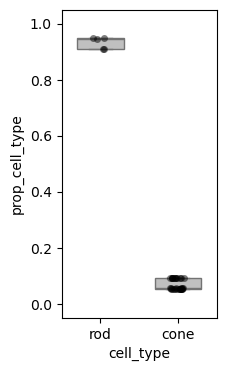

In [93]:
plt.figure(figsize=(2,4))
sns.boxplot(x='cell_type',
            y='prop_cell_type',
            data=tpm_opsins_stack[(tpm_opsins_stack['group']=='dlimno')],
            color='silver',
            #palette=opsin_colors,
            width=0.6)
plt.ylim(-0.05,1.05)
sns.stripplot(x='cell_type', y='prop_cell_type',
              data=tpm_opsins_stack[(tpm_opsins_stack['group']=='dlimno')],
              dodge=False, alpha=0.5, color='black')
plt.ylim(-0.05,1.05)

plt.show()

In [ ]:
#==================================================================================================================
#                                  RELATIVE OPSIN EXPRESSION: CONE OPSINS
##=================================================================================================================

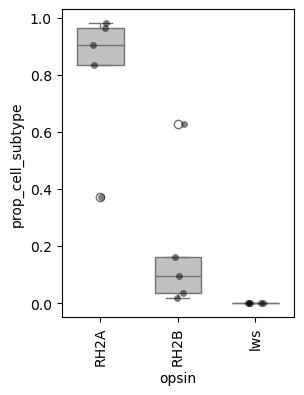

In [92]:
# Single vs double cone over total cone opsin expression

plt.figure(figsize=(3,4))
sns.boxplot(x='opsin',
            y='prop_cell_subtype',
            data=tpm_opsins_stack[(tpm_opsins_stack['group']=='dlimno') & (tpm_opsins_stack['cell_type']=='cone')].sort_values('cell_subtype', ascending=False),
            color='silver',
            #palette=opsin_colors,
            width=0.6)
plt.xticks(rotation=90)
sns.stripplot(x='opsin', y='prop_cell_subtype',
              data=tpm_opsins_stack[(tpm_opsins_stack['group']=='dlimno') & (tpm_opsins_stack['cell_type']=='cone')].sort_values('cell_subtype',ascending=False),
              dodge=False, alpha=0.5, color='black')

plt.show()